Используя датасет "Пассажиры автобуса", создайте нейронную сеть для решения задачи классификации пассажиров на входящих и выходящих.

Добейтесь точности работы модели выше 90% на проверочной выборке

### Загрузка данных


In [1]:
# загрузка библиотек

# методы для отрисовки изображений
from PIL import Image

# Для отрисовки графиков
import matplotlib.pyplot as plt

# Для генерации случайных чисел
import random

# Библиотека работы с массивами
import numpy as np

# Для работы с файлами
import os

# импортируем модуль для загрузки данных
import gdown

# для разделения выборок
from sklearn.model_selection import train_test_split

# для создания сети
from tensorflow.keras.models import Sequential

# для создания слоев
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# для работы с изображениями
from tensorflow.keras.preprocessing import image

# оптимизатор
from tensorflow.keras.optimizers import Adam

# модуль для отсчета времени
import time

In [2]:
# загрузка датасета, укажем путь к базе в Google Drive, база в виде .zip-архива
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip', None, quiet=True)

# Распакуем архив в директорию 'content/bus'
!unzip -q "bus.zip" -d /content/bus

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/bus/'

# Получение списка папок, находящемуся по адресу в скобках
os.listdir(IMAGE_PATH)

['Выходящий', 'Входящий']

In [3]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 2, метки классов: ['Входящий', 'Выходящий']


In [4]:
# Получения списка файлов для каждого класса

for cls in CLASS_LIST:
    print(cls, ':', os.listdir(f'{IMAGE_PATH}{cls}/'))

Входящий : ['05594.jpg', '03648.jpg', '03611.jpg', '04341.jpg', '02705.jpg', '02031.jpg', '02797.jpg', '00215.jpg', '01977.jpg', '02720.jpg', '00710.jpg', '02927.jpg', '02321.jpg', '01319.jpg', '00701.jpg', '04413.jpg', '06339.jpg', '03122.jpg', '05839.jpg', '05893.jpg', '03450.jpg', '03430.jpg', '05099.jpg', '05998.jpg', '04546.jpg', '02286.jpg', '05285.jpg', '04062.jpg', '00888.jpg', '04811.jpg', '04051.jpg', '04043.jpg', '02519.jpg', '06226.jpg', '03522.jpg', '05415.jpg', '04704.jpg', '03383.jpg', '01571.jpg', '05399.jpg', '02374.jpg', '04879.jpg', '03811.jpg', '02175.jpg', '03976.jpg', '02219.jpg', '04276.jpg', '06410.jpg', '05213.jpg', '02174.jpg', '06262.jpg', '05050.jpg', '06019.jpg', '01474.jpg', '02192.jpg', '05388.jpg', '01213.jpg', '02738.jpg', '02393.jpg', '00439.jpg', '04045.jpg', '06101.jpg', '05967.jpg', '04883.jpg', '04971.jpg', '02101.jpg', '01156.jpg', '05358.jpg', '01806.jpg', '01597.jpg', '03881.jpg', '02578.jpg', '01794.jpg', '00946.jpg', '01701.jpg', '06413.jpg', 

Отобразим визуально для примера по одному изображению из каждого класса (при помощи функции `.imshow()` из модуля `matplotlib.pyplot`):

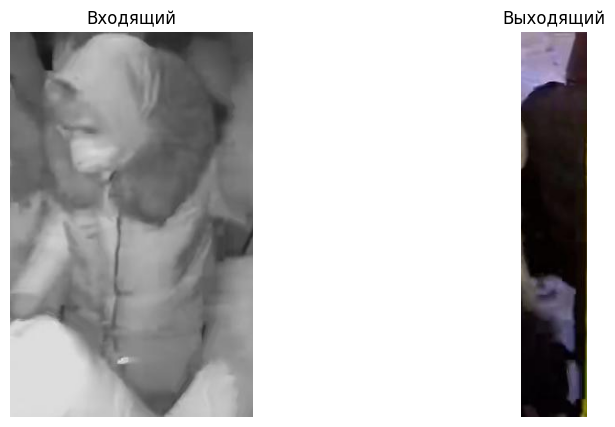

In [5]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(10, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):

    # Формирование пути к папке содержимого класса
    car_path = f'{IMAGE_PATH}{CLASS_LIST[i]}/'

    # Выбор случайного фото из i-го класса
    img_path = car_path + random.choice(os.listdir(car_path))

    # Отображение фотографии (подробнее будет объяснено далее)
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

In [6]:
data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} фото')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print()
print('Общий размер базы для обучения:', len(data_labels))

Размер класса Входящий составляет 6485 фото
Размер класса Выходящий составляет 2596 фото

Общий размер базы для обучения: 9081


In [ ]:
# ваше решение

In [7]:
train_files, test_files, train_labels, test_labels = train_test_split(
    data_files, data_labels, test_size=0.2, random_state=42, stratify=data_labels
)


In [8]:
def load_and_preprocess_image(file_path, target_size=(128, 128)):
    img = Image.open(file_path)
    img = img.resize(target_size)
    img = np.array(img) / 255.0  # Нормировка
    if len(img.shape) == 2:  # Если изображение в градациях серого
        img = np.stack((img,) * 3, axis=-1)  # Преобразование в RGB
    return img

In [9]:
# Подготовка данных
X_train = np.array([load_and_preprocess_image(file) for file in train_files])
X_test = np.array([load_and_preprocess_image(file) for file in test_files])
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [11]:
# Создание модели
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(CLASS_COUNT, activation='softmax')
])

# Компиляция модели
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Обучение модели
start_time = time.time()
history = model.fit(X_train, y_train,
    batch_size=128,
    epochs=30,
    validation_data=(X_test, y_test),
    verbose=1
)
print(f"Время обучения: {time.time() - start_time:.2f} секунд")

# Оценка модели
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Точность на проверочной выборке: {test_acc * 100:.2f}%')

Epoch 1/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - accuracy: 0.6853 - loss: 1.1015 - val_accuracy: 0.7006 - val_loss: 1.6701
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.8755 - loss: 0.2876 - val_accuracy: 0.7391 - val_loss: 0.6051
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9265 - loss: 0.1850 - val_accuracy: 0.5740 - val_loss: 0.6946
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.9460 - loss: 0.1439 - val_accuracy: 0.6037 - val_loss: 1.5231
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.8853 - loss: 0.2944 - val_accuracy: 0.4271 - val_loss: 1.6963
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9380 - loss: 0.1673 - val_accuracy: 0.4205 - val_loss: 1.9933
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9617 - loss: 0.1066 - val_accuracy: 0.6544 - val_loss: 1.4311
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.9563 - loss: 0.1135 - val_accuracy: 0.5713 -